In [91]:
!pip install ucimlrepo

In [92]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets
z = heart_disease.data

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [94]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [95]:
import pandas as pd
data = pd.concat([X, y], axis=1)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [97]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [98]:
y.sample(5)

,num
272,2
79,3
12,2
49,0
256,0


In [99]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [100]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [101]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy="mean")  # Use "median" if outliers are present

# Apply imputation to the feature set
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [102]:
print(df_cleaned.isnull().sum())  # Shows the count of missing values per column


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [103]:
print(y.value_counts())

num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64


* As Our Data Distribution is Imbalances So I Will Use Smote to Balance It

In [104]:
!pip install imbalanced-learn  # Install if not already installed
from imblearn.over_sampling import SMOTE

In [105]:
X = data.drop('num', axis=1)
y = data['num']

In [106]:
from sklearn.impute import SimpleImputer

# Initialize the imputer (use 'mean' or 'median' strategy)
imputer = SimpleImputer(strategy="mean")  # Use "median" if data has outliers

# Apply imputation to X
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Verify that missing values are handled
print(X_imputed.isnull().sum())  # Should print all zeros


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [107]:
print(y.value_counts())


num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [108]:
print(y.isnull().sum())


0


In [109]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE on the imputed dataset (X_imputed instead of X)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Check new class distribution
import pandas as pd
print(pd.Series(y_resampled).value_counts())

num
0    164
2    164
1    164
3    164
4    164
Name: count, dtype: int64


In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)  # Apply to resampled dataset


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Dictionary to store model evaluation
model_reports = {}

# Define models
models = {
    "XGBoost": xgb.XGBClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    report = classification_report(y_test, y_pred, output_dict=True)

    model_reports[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1-score": report["weighted avg"]["f1-score"]
    }


Model: XGBoost
Accuracy: 0.8597560975609756
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.86        28
           1       0.74      0.80      0.77        35
           2       0.89      0.89      0.89        35
           3       0.86      0.94      0.90        33
           4       0.91      0.88      0.89        33

    accuracy                           0.86       164
   macro avg       0.87      0.86      0.86       164
weighted avg       0.87      0.86      0.86       164

Model: Random Forest
Accuracy: 0.8841463414634146
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.81      0.74      0.78        35
           2       0.82      0.91      0.86        35
           3       0.89      0.97      0.93        33
           4       0.97      0.97      0.97        33

    accuracy                           0.88

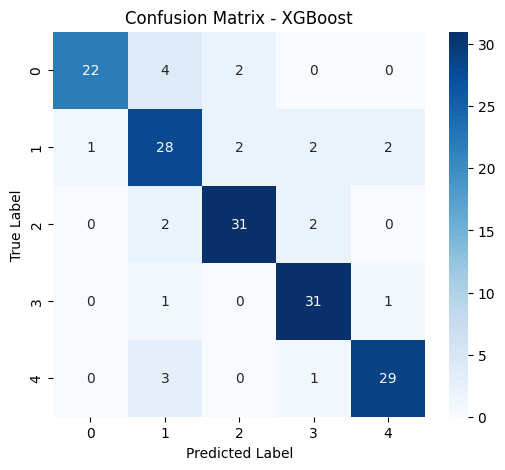

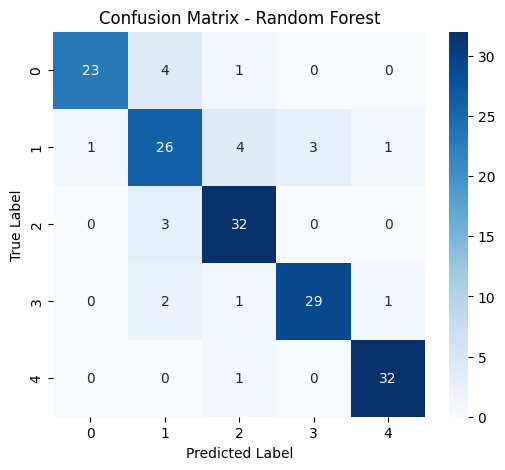

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Predictions
y_pred_xgb = models["XGBoost"].predict(X_test)
y_pred_rf = models["Random Forest"].predict(X_test)

# Plot Confusion Matrices
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


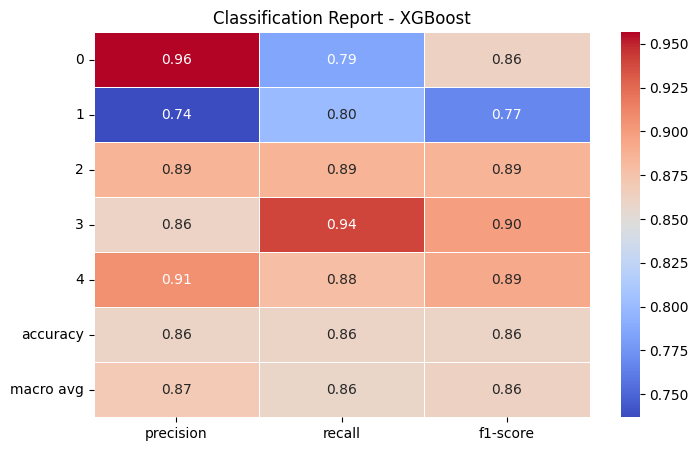

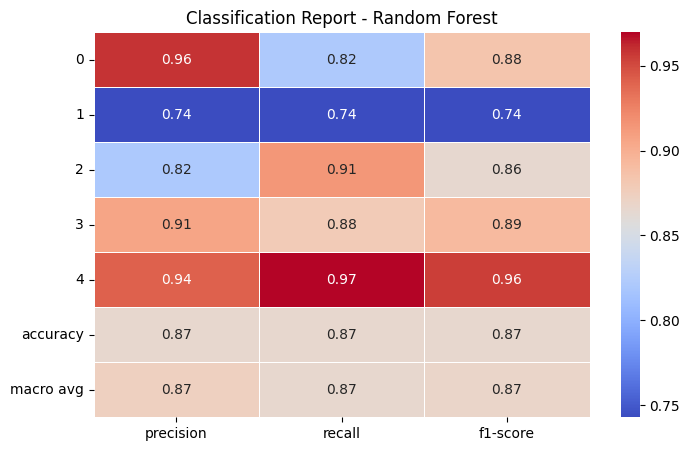

In [115]:
from sklearn.metrics import classification_report
import pandas as pd

# Function to plot classification report heatmap
def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).T.iloc[:-1, :-1]  # Remove 'accuracy' row for better visualization

    plt.figure(figsize=(8,5))
    sns.heatmap(df_report, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
    plt.title(f"Classification Report - {model_name}")
    plt.show()

# Plot for both models
plot_classification_report(y_test, y_pred_xgb, "XGBoost")
plot_classification_report(y_test, y_pred_rf, "Random Forest")


<Figure size 1000x500 with 0 Axes>

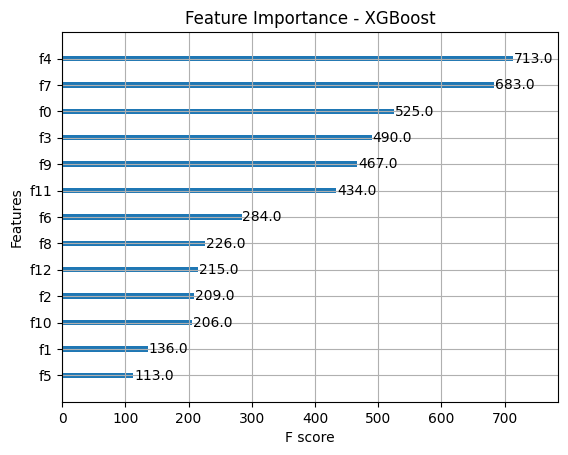

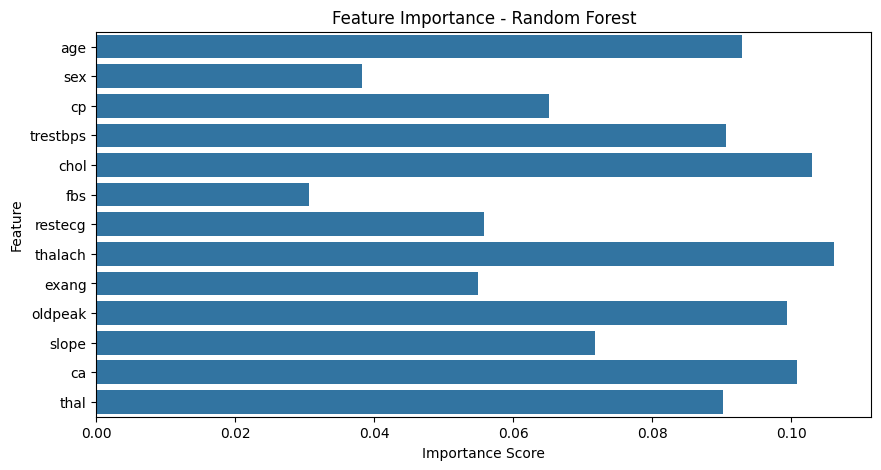

In [117]:
# Feature Importance for XGBoost
plt.figure(figsize=(10,5))
xgb.plot_importance(models["XGBoost"])
plt.title("Feature Importance - XGBoost")
plt.show()

# Feature Importance for Random Forest
importances_rf = models["Random Forest"].feature_importances_
features = X.columns

plt.figure(figsize=(10,5))
sns.barplot(x=importances_rf, y=features)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.show()


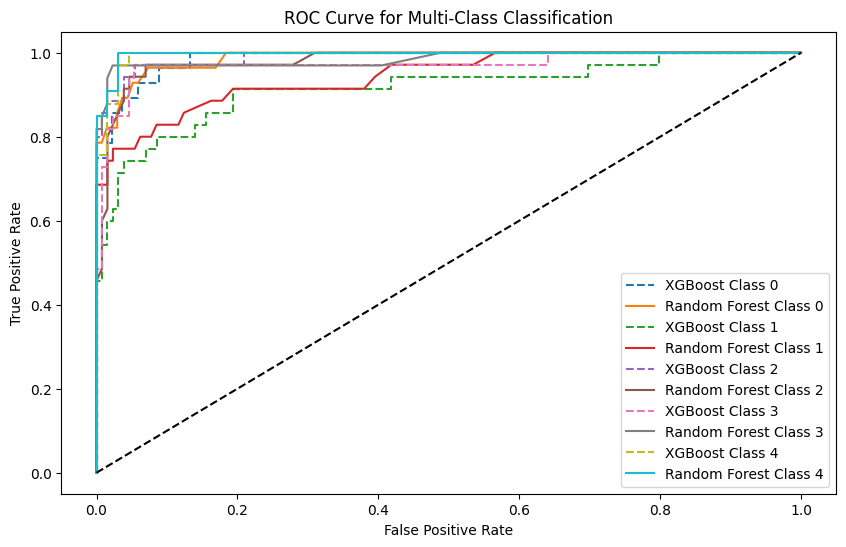

In [118]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4])
n_classes = y_test_bin.shape[1]

# Train OneVsRest Classifier for ROC Curve
xgb_classifier = OneVsRestClassifier(XGBClassifier()).fit(X_train, label_binarize(y_train, classes=[0,1,2,3,4]))
rf_classifier = OneVsRestClassifier(RandomForestClassifier()).fit(X_train, label_binarize(y_train, classes=[0,1,2,3,4]))

y_score_xgb = xgb_classifier.predict_proba(X_test)
y_score_rf = rf_classifier.predict_proba(X_test)

plt.figure(figsize=(10,6))

for i in range(n_classes):
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test_bin[:, i], y_score_xgb[:, i])
    fpr_rf, tpr_rf, _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])

    plt.plot(fpr_xgb, tpr_xgb, linestyle="--", label=f"XGBoost Class {i}")
    plt.plot(fpr_rf, tpr_rf, linestyle="-", label=f"Random Forest Class {i}")

plt.plot([0,1], [0,1], "k--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Classification")
plt.legend()
plt.show()


#**Hyperparameter Tuning**

**Random Search**

In [136]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [120]:
# Define parameter grid for Random Search
rf_param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

xgb_param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3]
}

In [124]:
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

In [125]:
rf_random = RandomizedSearchCV(rf, rf_param_dist, n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42)
xgb_random = RandomizedSearchCV(xgb, xgb_param_dist, n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42)

In [126]:
rf_random.fit(X_train, y_train)
xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:59:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=2)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, verbose=2)

In [127]:
print("Best RF Params:", rf_random.best_params_)
print("Best XGB Params:", xgb_random.best_params_)

Best RF Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Best XGB Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


In [128]:
from sklearn.metrics import accuracy_score

# Predictions using best parameters
rf_best = rf_random.best_estimator_
xgb_best = xgb_random.best_estimator_

rf_pred = rf_best.predict(X_test)
xgb_pred = xgb_best.predict(X_test)

# Accuracy before tuning
rf_base = RandomForestClassifier(random_state=42)
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

rf_base.fit(X_train, y_train)
xgb_base.fit(X_train, y_train)

rf_base_pred = rf_base.predict(X_test)
xgb_base_pred = xgb_base.predict(X_test)

print("Random Forest - Before Tuning:", accuracy_score(y_test, rf_base_pred))
print("Random Forest - After Tuning:", accuracy_score(y_test, rf_pred))

print("XGBoost - Before Tuning:", accuracy_score(y_test, xgb_base_pred))
print("XGBoost - After Tuning:", accuracy_score(y_test, xgb_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:06:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest - Before Tuning: 0.8780487804878049
Random Forest - After Tuning: 0.8841463414634146
XGBoost - Before Tuning: 0.8597560975609756
XGBoost - After Tuning: 0.8658536585365854


#**Grid Search**

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
rf_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

In [139]:
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_grid, cv=5, verbose=2, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [161]:
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
import xgboost as xgb

# Define hyperparameter grids
xgb_grid_params = {
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0]
}

xgb_bayes_params = {
    "learning_rate": (0.01, 0.2),
    "n_estimators": (100, 500),
    "max_depth": (3, 10),
    "subsample": (0.6, 1.0)
}

# Initialize base XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV
xgb_grid_search = GridSearchCV(xgb_model, xgb_grid_params, cv=5, verbose=2, n_jobs=-1)

# Initialize BayesSearchCV
xgb_bayes = BayesSearchCV(xgb_model, xgb_bayes_params, n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42)


In [162]:
# Train XGBoost (GridSearchCV)
xgb_grid_search.fit(X_train, y_train)

# Train XGBoost (BayesSearchCV)
xgb_bayes.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None...
                                      max_delta_step=None, max_depth=None,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      random_state=42, ...),
              n_iter=20, n_jobs=-1, random_state=42,
              search_spaces={'learning_rate': (0.01, 0.2), 'max_depth': (3, 10),
                             'n_estimators': (100, 500),
                             'subsample': (0.6, 1.0)},
              verbose=2)

In [163]:
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store model evaluation
xgb_reports = {}

# Evaluate XGBoost (GridSearchCV)
y_pred_grid = xgb_grid_search.best_estimator_.predict(X_test)
report_grid = classification_report(y_test, y_pred_grid, output_dict=True)
xgb_reports["XGBoost (GridSearchCV)"] = {
    "best_params": xgb_grid_search.best_params_,
    "accuracy": accuracy_score(y_test, y_pred_grid),
    "precision": report_grid["weighted avg"]["precision"],
    "recall": report_grid["weighted avg"]["recall"],
    "f1-score": report_grid["weighted avg"]["f1-score"]
}

# Evaluate XGBoost (BayesSearchCV)
y_pred_bayes = xgb_bayes.best_estimator_.predict(X_test)
report_bayes = classification_report(y_test, y_pred_bayes, output_dict=True)
xgb_reports["XGBoost (BayesSearchCV)"] = {
    "best_params": xgb_bayes.best_params_,
    "accuracy": accuracy_score(y_test, y_pred_bayes),
    "precision": report_bayes["weighted avg"]["precision"],
    "recall": report_bayes["weighted avg"]["recall"],
    "f1-score": report_bayes["weighted avg"]["f1-score"]
}

# Print the results
print(xgb_reports)


{'XGBoost (GridSearchCV)': {'best_params': {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}, 'accuracy': 0.8475609756097561, 'precision': 0.8540117581456639, 'recall': 0.8475609756097561, 'f1-score': 0.848081237652394}, 'XGBoost (BayesSearchCV)': {'best_params': OrderedDict([('learning_rate', 0.149465323417258), ('max_depth', 10), ('n_estimators', 165), ('subsample', 0.6753701167061721)]), 'accuracy': 0.8780487804878049, 'precision': 0.8789586715623348, 'recall': 0.8780487804878049, 'f1-score': 0.8776170102919565}}


In [140]:
print("Best RF Params from Grid Search:", rf_grid_search.best_params_)

Best RF Params from Grid Search: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


#**Bayesian Optimization**

In [144]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.8 MB/s eta 0:00:00


In [145]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real

In [146]:
rf_bayes_params = {
    "n_estimators": Integer(50, 300),
    "max_depth": Integer(5, 30),
    "min_samples_split": Integer(2, 10),
    "min_samples_leaf": Integer(1, 4),
    "bootstrap": [True, False]
}

In [147]:
rf_bayes = BayesSearchCV(
    RandomForestClassifier(random_state=42),
    rf_bayes_params,
    n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42
)

In [148]:
rf_bayes.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
              n_iter=20, n_jobs=-1, random_state=42,
              search_spaces={'bootstrap': [True, False],
                             'max_depth': Integer(low=5, high=30, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=4, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=300, prior='uniform', transform='normalize')},
              verbose=2)

In [149]:
print("Best RF Params from Bayesian Optimization:", rf_bayes.best_params_)

Best RF Params from Bayesian Optimization: OrderedDict([('bootstrap', False), ('max_depth', 20), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 300)])


In [167]:
# Initialize model reports dictionary
model_reports = {}

# Base Models (Default Parameters)
models = {
    "XGBoost (Base)": xgb.XGBClassifier(),
    "Random Forest (Base)": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    model_reports[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1-score": report["weighted avg"]["f1-score"]
    }

# Hyperparameter Tuned Models
tuned_models = {
    "Random Forest (Random Search)": rf_random,
    "Random Forest (Grid Search)": rf_grid_search,
    "Random Forest (Bayes Search)": rf_bayes,
    "XGBoost (Random Search)": xgb_random,
    "XGBoost (Grid Search)": xgb_grid_search,
    "XGBoost (Bayes Search)": xgb_bayes
}

for name, model in tuned_models.items():
    y_pred = model.best_estimator_.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    model_reports[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": report["weighted avg"]["precision"],
        "recall": report["weighted avg"]["recall"],
        "f1-score": report["weighted avg"]["f1-score"]
    }

print("All models stored in dictionary successfully!")


All models stored in dictionary successfully!


In [168]:
# Extract model names and metrics
models = list(model_reports.keys())
accuracy = [model_reports[m]["accuracy"] for m in models]
precision = [model_reports[m]["precision"] for m in models]
recall = [model_reports[m]["recall"] for m in models]
f1_score = [model_reports[m]["f1-score"] for m in models]


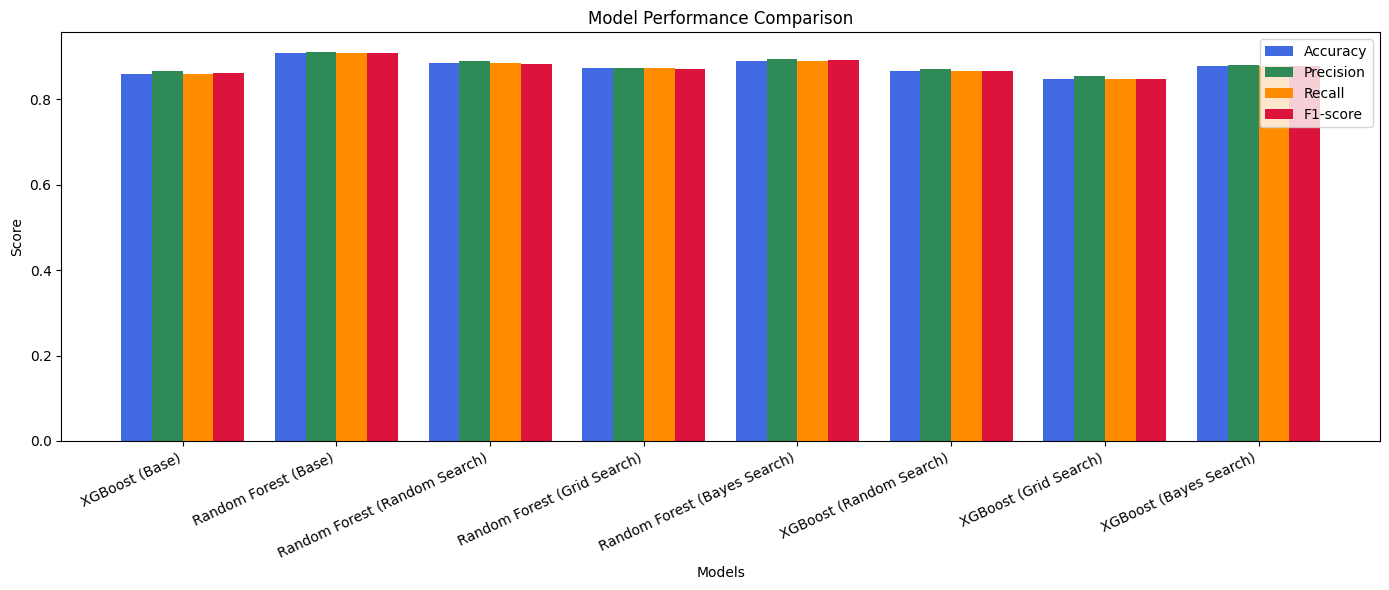

In [169]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names and metrics
models = list(model_reports.keys())
accuracy = [model_reports[m]["accuracy"] for m in models]
precision = [model_reports[m]["precision"] for m in models]
recall = [model_reports[m]["recall"] for m in models]
f1_score = [model_reports[m]["f1-score"] for m in models]

# Set bar width and positions
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))

# Plot each metric
ax.bar(x - 1.5 * width, accuracy, width, label="Accuracy", color="royalblue")
ax.bar(x - 0.5 * width, precision, width, label="Precision", color="seagreen")
ax.bar(x + 0.5 * width, recall, width, label="Recall", color="darkorange")
ax.bar(x + 1.5 * width, f1_score, width, label="F1-score", color="crimson")

# Label settings
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=25, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


In [174]:
import seaborn as sns

# Convert model reports dictionary to DataFrame
import pandas as pd
df_results = pd.DataFrame(model_reports).T  # Transpose for better visualization

df_results

,accuracy,precision,recall,f1-score
XGBoost (Base),0.859756,0.865213,0.859756,0.860393
Random Forest (Base),0.908537,0.911021,0.908537,0.907689
Random Forest (Random Search),0.884146,0.888559,0.884146,0.883477
Random Forest (Grid Search),0.871951,0.874056,0.871951,0.871554
Random Forest (Bayes Search),0.890244,0.895246,0.890244,0.890931
XGBoost (Random Search),0.865854,0.871888,0.865854,0.865046
XGBoost (Grid Search),0.847561,0.854012,0.847561,0.848081
XGBoost (Bayes Search),0.878049,0.878959,0.878049,0.877617


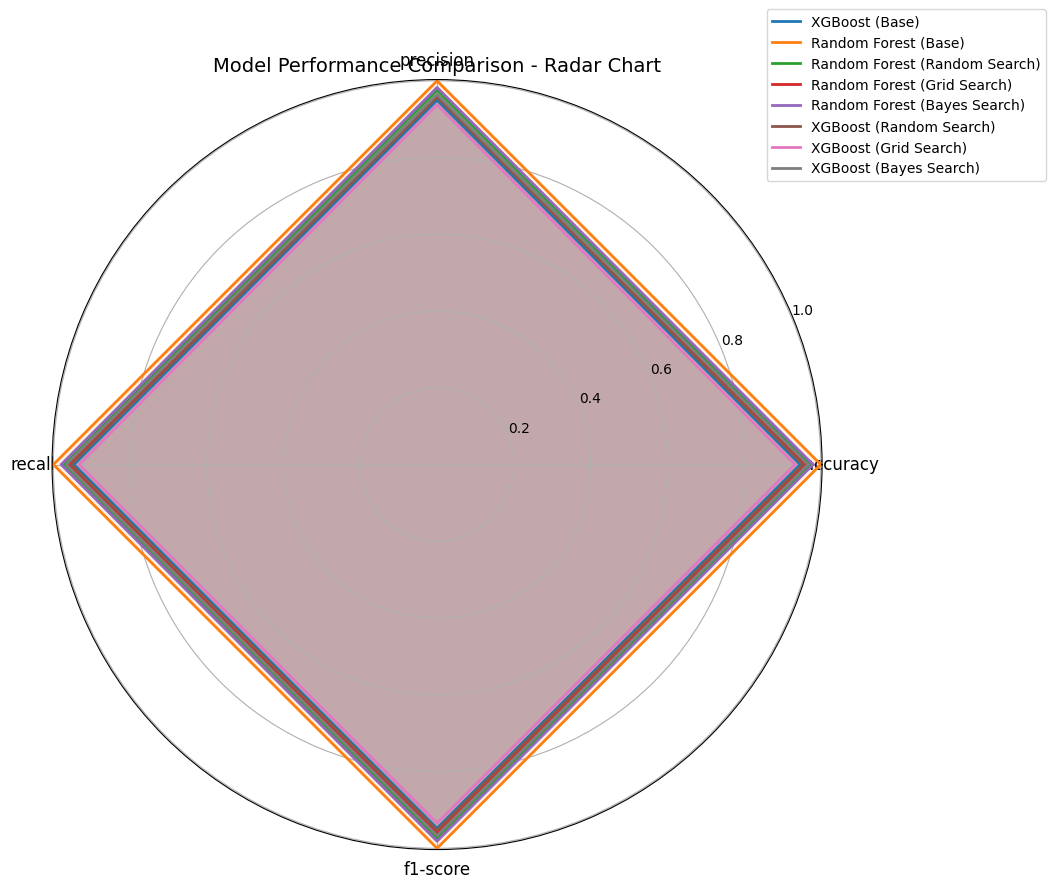

In [172]:
import numpy as np
from math import pi

# Normalize data (scale between 0-1)
df_normalized = df_results / df_results.max()

# Define categories and angles for radar chart
categories = list(df_results.columns)
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Close the circle

# Plot each model
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

for model in df_normalized.index:
    values = df_normalized.loc[model].tolist()
    values += values[:1]  # Close the circle
    ax.plot(angles, values, label=model, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.1)  # Fill area

# Labels and aesthetics
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
plt.title("Model Performance Comparison - Radar Chart", size=14)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()


#**Optuna**

In [176]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.5 MB/s eta 0:00:00


In [177]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Objective function for Random Forest
def rf_objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
    max_depth = trial.suggest_int("max_depth", 5, 50, step=5)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20, step=2)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10, step=1)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    return scores.mean()

# Run Optuna study
rf_study = optuna.create_study(direction="maximize")
rf_study.optimize(rf_objective, n_trials=20)

# Best parameters for Random Forest
best_rf_params = rf_study.best_params
print("Best RF Params:", best_rf_params)

# Train with best parameters
best_rf = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf.fit(X_train, y_train)


[I 2025-02-16 21:15:52,764] A new study created in memory with name: no-name-dc59dd95-2d04-49d3-b453-d8f9de4d500c
[I 2025-02-16 21:15:55,287] Trial 0 finished with value: 0.7866296553319454 and parameters: {'n_estimators': 300, 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.7866296553319454.
[I 2025-02-16 21:15:57,430] Trial 1 finished with value: 0.7485195466111496 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.7866296553319454.
[I 2025-02-16 21:15:59,178] Trial 2 finished with value: 0.7271570668517233 and parameters: {'n_estimators': 250, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.7866296553319454.
[I 2025-02-16 21:16:01,883] Trial 3 finished with value: 0.7607217210270645 and parameters: {'n_estimators': 300, 'max_depth': 25, 'min_samples_split': 20, 'min_samples_leaf': 4}. Best is trial 0 with val

Best RF Params: {'n_estimators': 200, 'max_depth': 35, 'min_samples_split': 4, 'min_samples_leaf': 2}


RandomForestClassifier(max_depth=35, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=200, random_state=42)

In [181]:
import xgboost as xgb

# Objective function for XGBoost
def xgb_objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
    max_depth = trial.suggest_int("max_depth", 3, 15, step=2)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05)
    subsample = trial.suggest_float("subsample", 0.5, 1.0, step=0.1)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0, step=0.1)

    model = xgb.XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )

    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    return scores.mean()

# Run Optuna study
xgb_study = optuna.create_study(direction="maximize")
xgb_study.optimize(xgb_objective, n_trials=20)

# Best parameters for XGBoost
best_xgb_params = xgb_study.best_params
print("Best XGBoost Params:", best_xgb_params)

# Train with best parameters
best_xgb = xgb.XGBClassifier(**best_xgb_params, random_state=42)
best_xgb.fit(X_train, y_train)


[I 2025-02-16 21:18:42,088] A new study created in memory with name: no-name-160ceddf-ec69-47d5-a3e4-006750d3198a
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.01, 0.3] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 0.26].
  warnings.warn(
[I 2025-02-16 21:18:43,928] Trial 0 finished with value: 0.8308119361554477 and parameters: {'n_estimators': 300, 'max_depth': 11, 'learning_rate': 0.26, 'subsample': 0.6, 'colsample_bytree': 0.9}. Best is trial 0 with value: 0.8308119361554477.
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:684: UserWarning: The distribution is specified by [0.01, 0.3] and step=0.05, but the range is not divisible by `step`. It will be replaced by [0.01, 0.26].
  warnings.warn(
[I 2025-02-16 21:18:45,310] Trial 1 finished with value: 0.8445292620865139 and parameters: {'n_estimators': 200, 'max_depth': 13, 'learning_rate': 0.26, 'subsample

Best XGBoost Params: {'n_estimators': 250, 'max_depth': 13, 'learning_rate': 0.21000000000000002, 'subsample': 0.8, 'colsample_bytree': 1.0}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.21000000000000002,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [183]:
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store results
model_reports["Random Forest (Optuna)"] = {
    "accuracy": accuracy_score(y_test, best_rf.predict(X_test)),
    "precision": classification_report(y_test, best_rf.predict(X_test), output_dict=True)["weighted avg"]["precision"],
    "recall": classification_report(y_test, best_rf.predict(X_test), output_dict=True)["weighted avg"]["recall"],
    "f1-score": classification_report(y_test, best_rf.predict(X_test), output_dict=True)["weighted avg"]["f1-score"]
}

model_reports["XGBoost (Optuna)"] = {
    "accuracy": accuracy_score(y_test, best_xgb.predict(X_test)),
    "precision": classification_report(y_test, best_xgb.predict(X_test), output_dict=True)["weighted avg"]["precision"],
    "recall": classification_report(y_test, best_xgb.predict(X_test), output_dict=True)["weighted avg"]["recall"],
    "f1-score": classification_report(y_test, best_xgb.predict(X_test), output_dict=True)["weighted avg"]["f1-score"]
}

print("Updated Model Reports:", model_reports)


Updated Model Reports: {'XGBoost (Base)': {'accuracy': 0.8597560975609756, 'precision': 0.8652134088203012, 'recall': 0.8597560975609756, 'f1-score': 0.8603933266633447}, 'Random Forest (Base)': {'accuracy': 0.9085365853658537, 'precision': 0.9110206871146613, 'recall': 0.9085365853658537, 'f1-score': 0.9076893656910383}, 'Random Forest (Random Search)': {'accuracy': 0.8841463414634146, 'precision': 0.8885590500641848, 'recall': 0.8841463414634146, 'f1-score': 0.8834765176716686}, 'Random Forest (Grid Search)': {'accuracy': 0.8719512195121951, 'precision': 0.8740558393759614, 'recall': 0.8719512195121951, 'f1-score': 0.8715541189692835}, 'Random Forest (Bayes Search)': {'accuracy': 0.8902439024390244, 'precision': 0.8952460351312576, 'recall': 0.8902439024390244, 'f1-score': 0.8909310751360366}, 'XGBoost (Random Search)': {'accuracy': 0.8658536585365854, 'precision': 0.8718877032520326, 'recall': 0.8658536585365854, 'f1-score': 0.8650460885879763}, 'XGBoost (Grid Search)': {'accuracy':

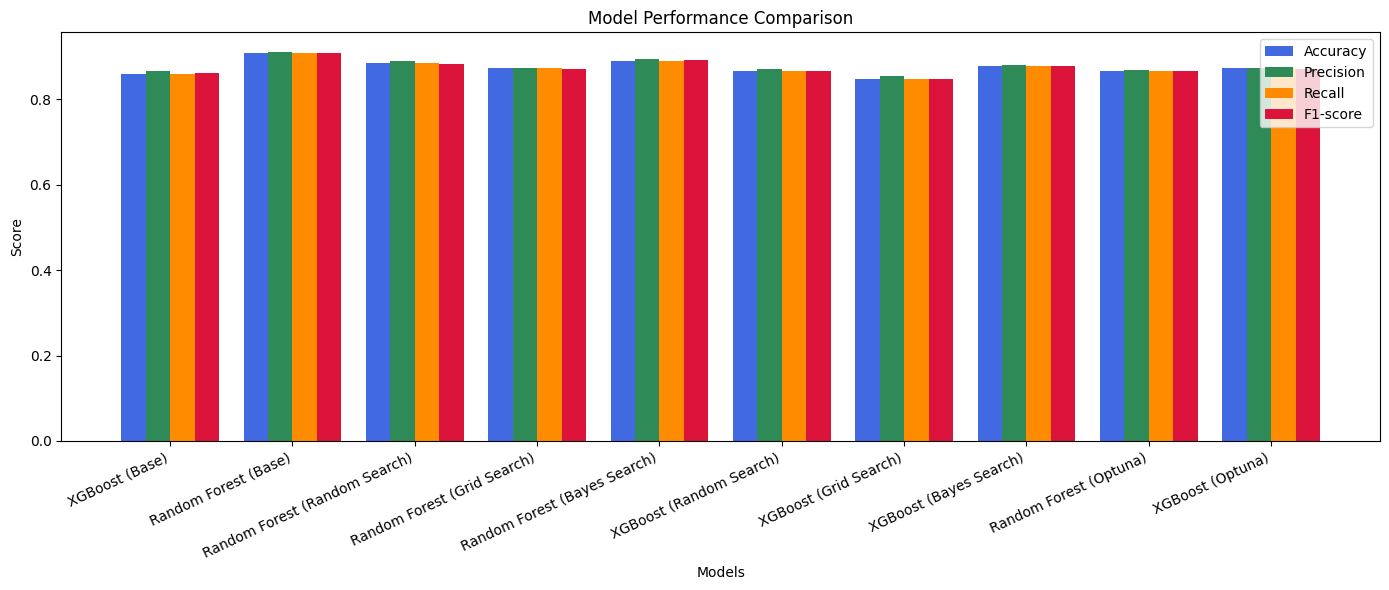

In [182]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names and metrics
models = list(model_reports.keys())
accuracy = [model_reports[m]["accuracy"] for m in models]
precision = [model_reports[m]["precision"] for m in models]
recall = [model_reports[m]["recall"] for m in models]
f1_score = [model_reports[m]["f1-score"] for m in models]

# Set bar width and positions
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))

# Plot each metric
ax.bar(x - 1.5 * width, accuracy, width, label="Accuracy", color="royalblue")
ax.bar(x - 0.5 * width, precision, width, label="Precision", color="seagreen")
ax.bar(x + 0.5 * width, recall, width, label="Recall", color="darkorange")
ax.bar(x + 1.5 * width, f1_score, width, label="F1-score", color="crimson")

# Label settings
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=25, ha="right")
ax.legend()

plt.tight_layout()
plt.show()
